In [1]:
from DataLoader import DataLoader, DataConcate
from sklearn.preprocessing import MinMaxScaler
from DataFiltering import DataFiltering

import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import os

DATA_EXPORT_PATH = "./data/exported/30sec/"

ecg_data_filtering = DataFiltering(sampling_rate=250)
scaler = MinMaxScaler()

In [2]:
dataconcater = DataConcate()
dataloader = DataLoader()

data_list = os.listdir("./data/walking")
walking_data_list = ["./data/walking" + "/" + data for data in data_list]

data_list = os.listdir("./data/running")
running_data_list = ["./data/running" + "/" + data for data in data_list]

data_list = os.listdir("./data/sitting")
sitting_data_list = ["./data/sitting" + "/" + data for data in data_list]

NON Mobile ./data/walking/ground_walking_test2.txt


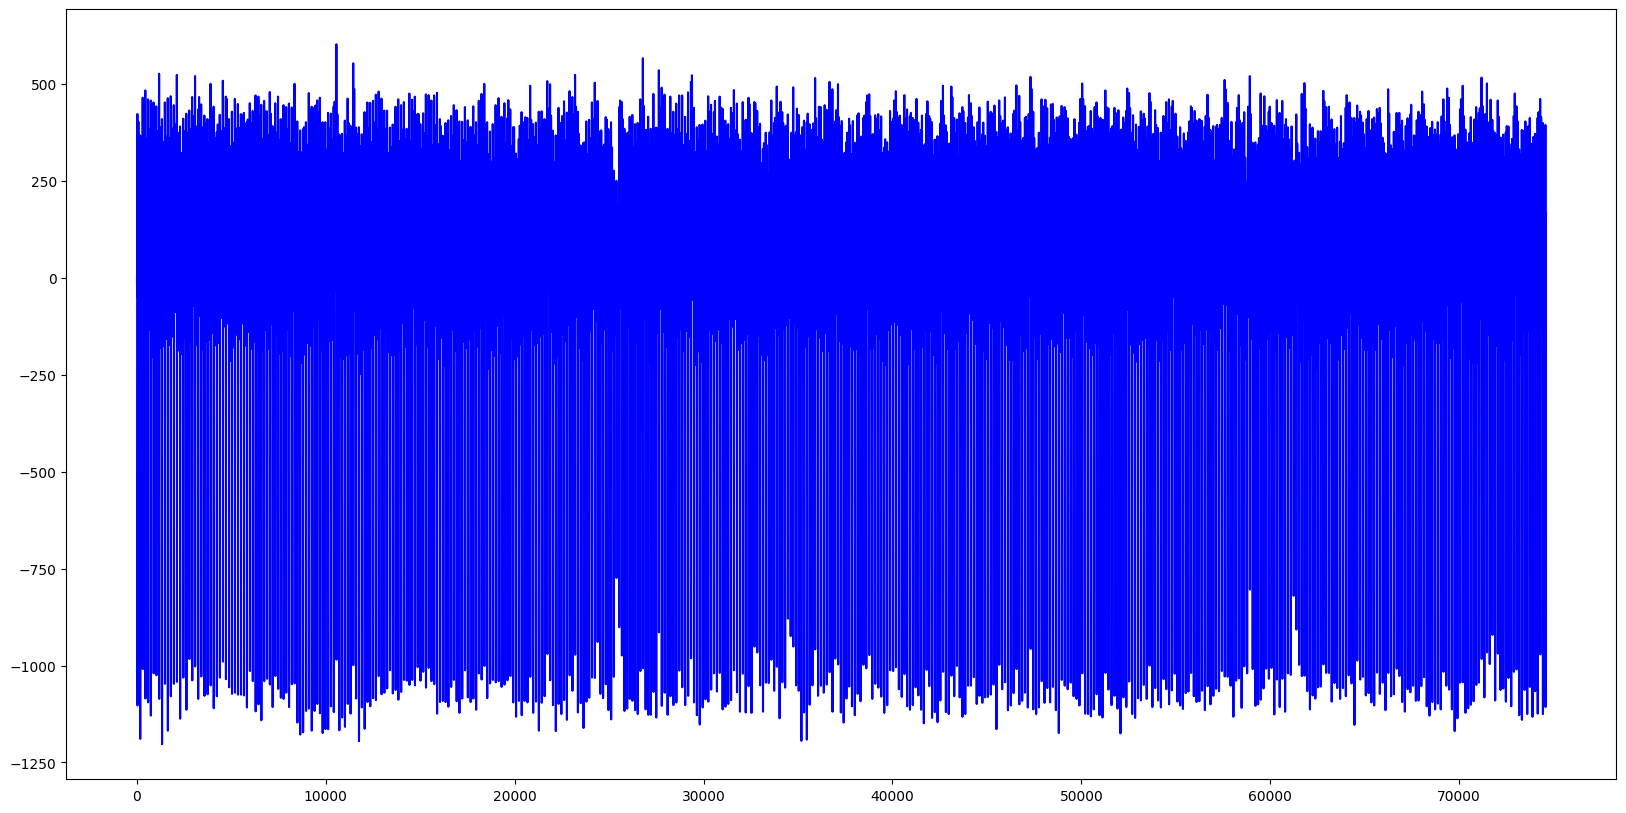

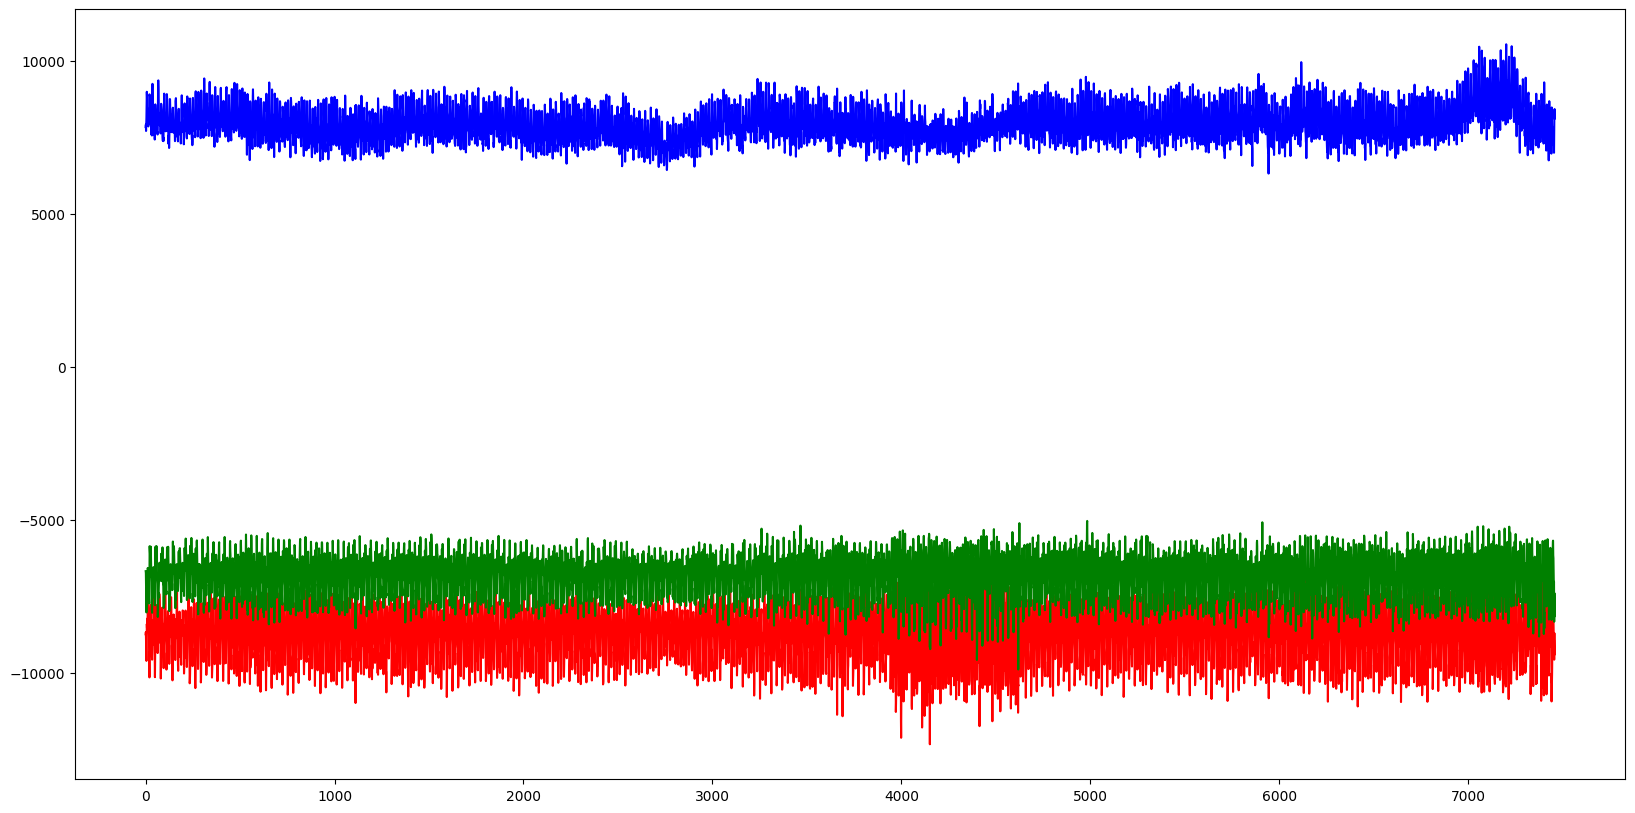

NON Mobile ./data/walking/walking_test.txt


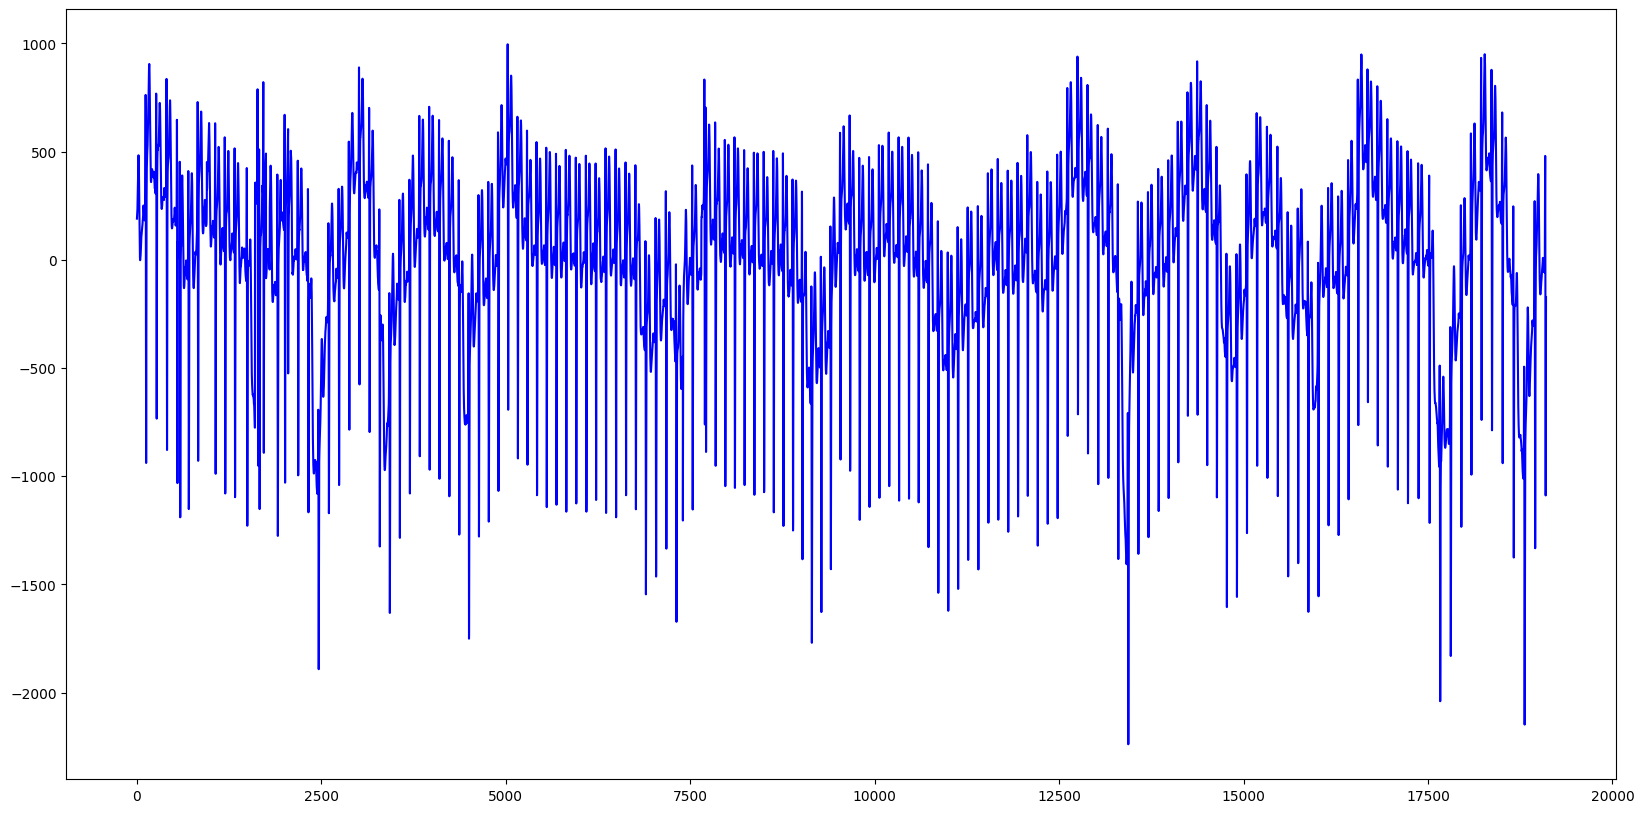

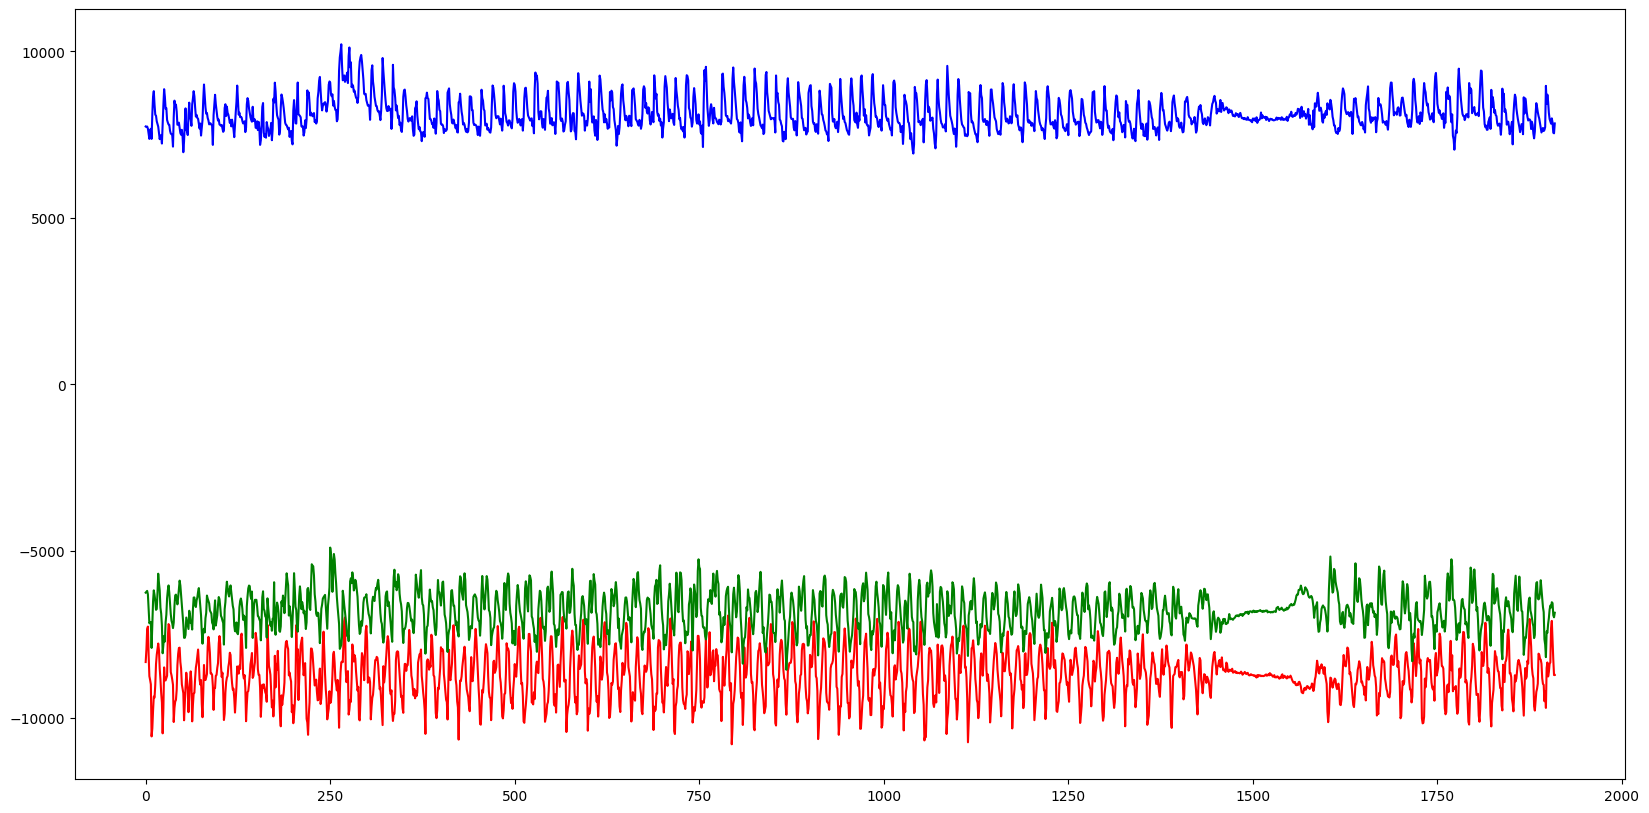

MOBILE ./data/walking/mobile_ground_walking_1.txt


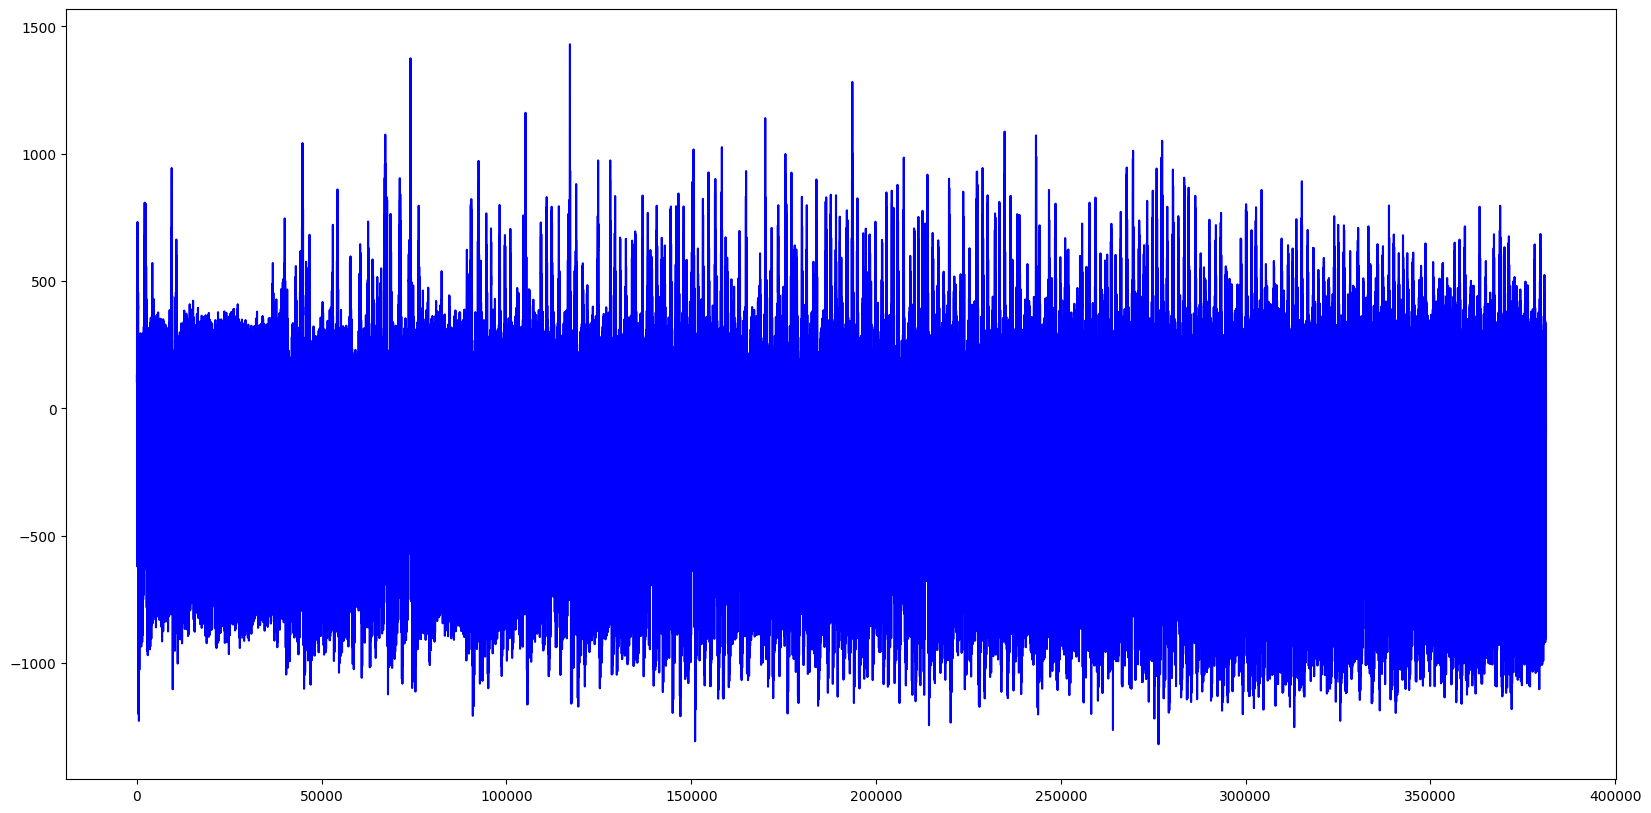

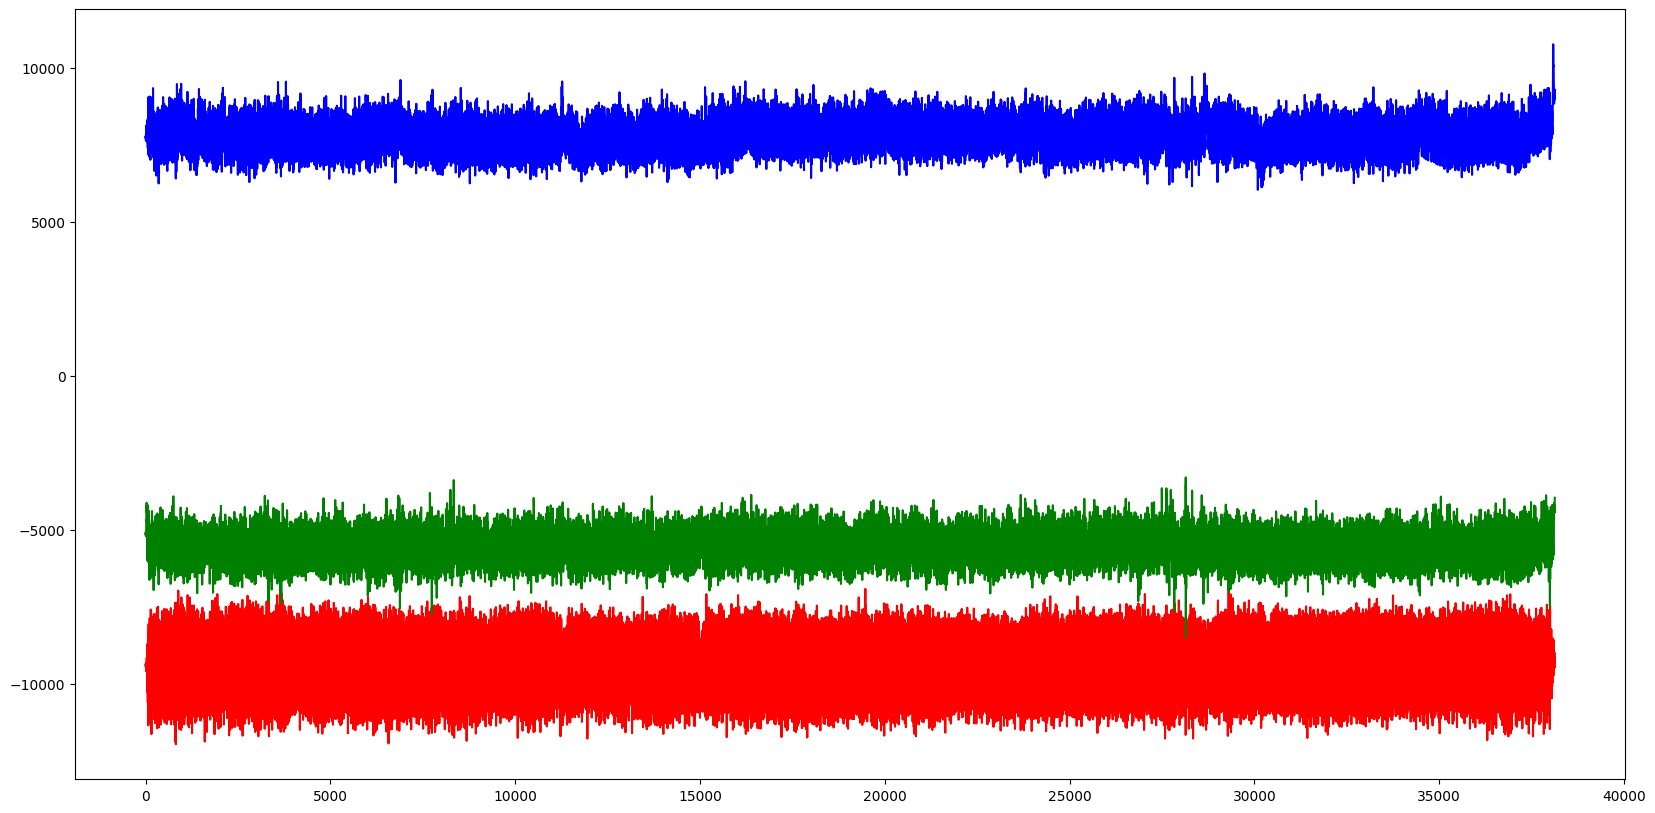

MOBILE ./data/walking/mobile_ground_walking_2.txt


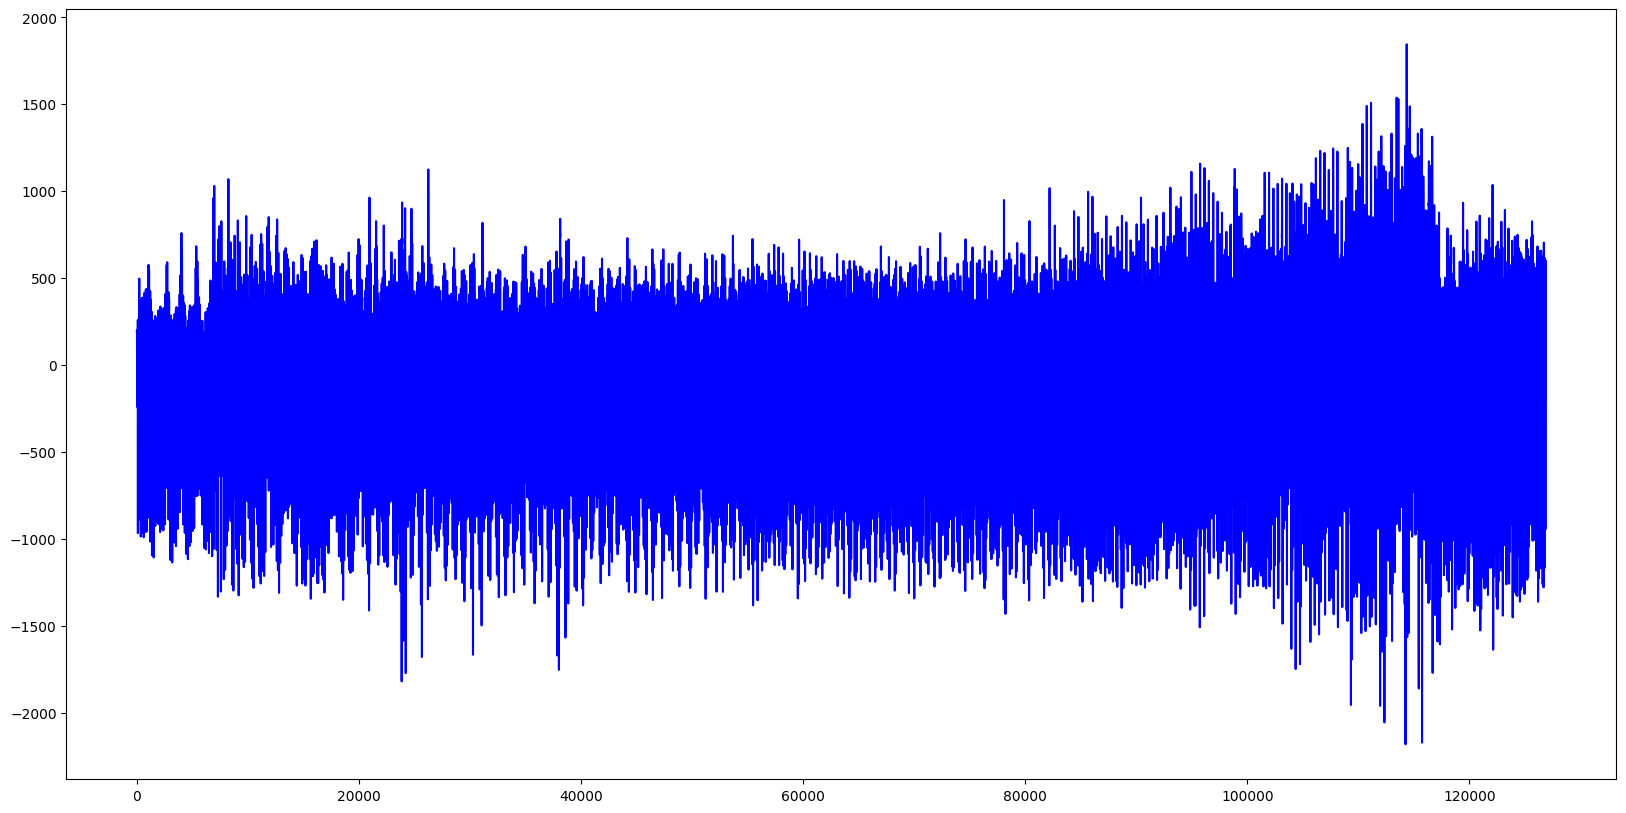

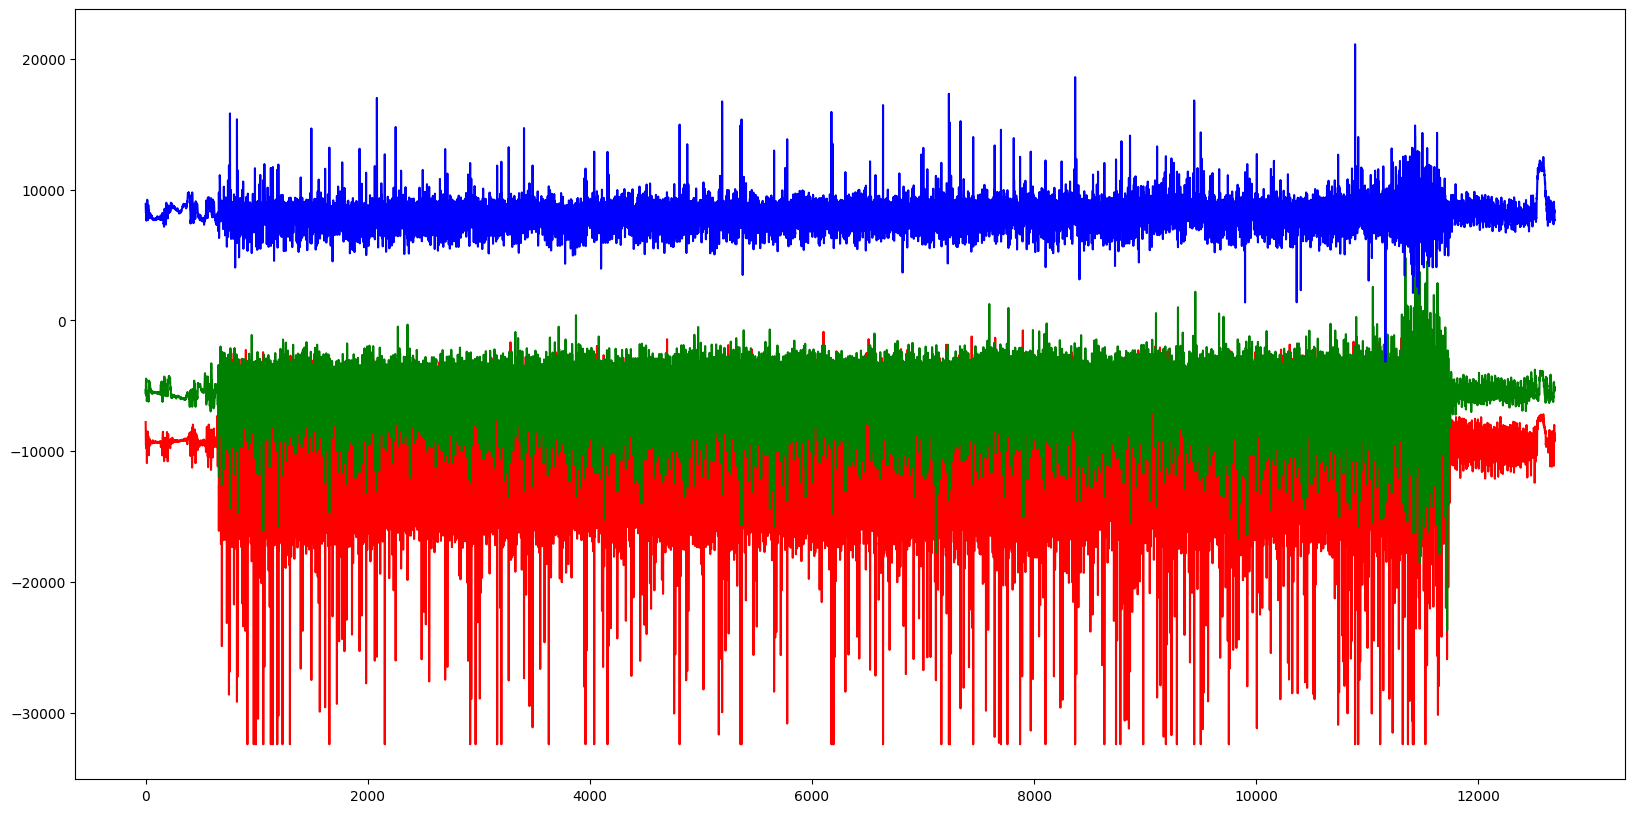

NON Mobile ./data/walking/ground_walking_test.txt


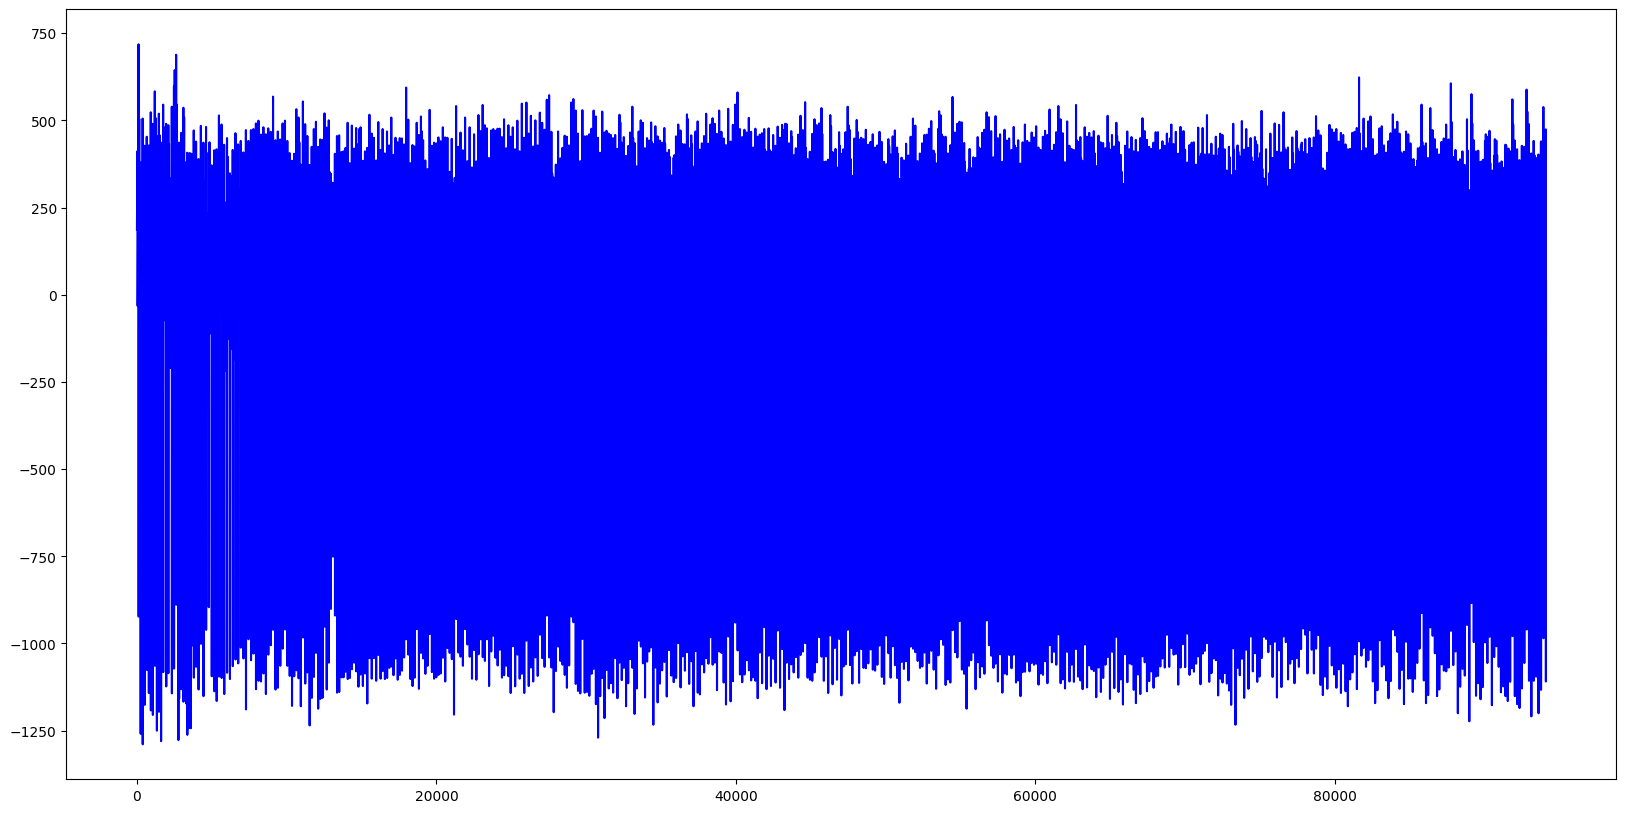

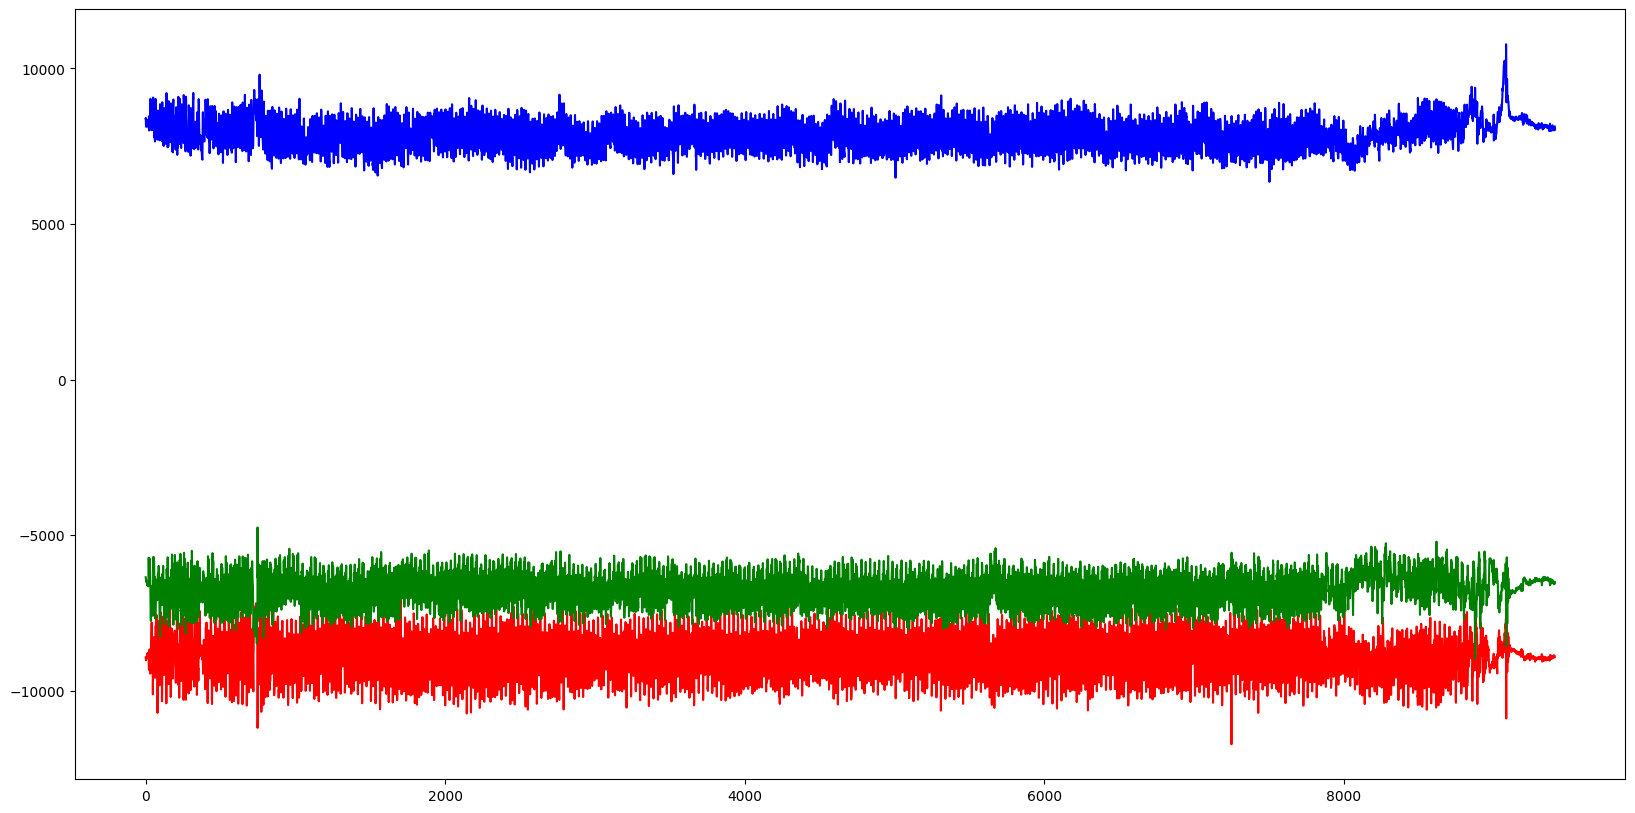

In [17]:

walking_ecg_concate, walking_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in walking_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    plt.figure(figsize=(20, 10))
    plt.plot(ecg, color="blue", label="ECG")
    plt.show()

    plt.figure(figsize=(20, 10))
    plt.plot(acc_x, color="red")
    plt.plot(acc_y, color="green")
    plt.plot(acc_z, color="blue")
    plt.show()

    walking_ecg_concate = np.concatenate((walking_ecg_concate, ecg), axis=0)
    walking_acc_concate = np.concatenate((walking_acc_concate, acc), axis=0)

walking_ecg_concate = walking_ecg_concate[1:]
walking_acc_concate = walking_acc_concate[1:]

In [18]:
thirty_sec_walking_ecg = dataloader.export_ecg_30sec(walking_ecg_concate)
thirty_sec_walking_acc = dataloader.export_acc_30sec(walking_acc_concate)

for idx in range(len(thirty_sec_walking_ecg)):
    print(f"{idx}th 1 minute walking ecg data shape:", end='')
    print(np.shape(thirty_sec_walking_ecg[idx]))

for idx in range(len(thirty_sec_walking_acc)):
    print(f"{idx}th 1 minute walking acc data shape:", end='')
    print(np.shape(thirty_sec_walking_acc[idx]))

0th 1 minute walking ecg data shape:(7500,)
1th 1 minute walking ecg data shape:(7500,)
2th 1 minute walking ecg data shape:(7500,)
3th 1 minute walking ecg data shape:(7500,)
4th 1 minute walking ecg data shape:(7500,)
5th 1 minute walking ecg data shape:(7500,)
6th 1 minute walking ecg data shape:(7500,)
7th 1 minute walking ecg data shape:(7500,)
8th 1 minute walking ecg data shape:(7500,)
9th 1 minute walking ecg data shape:(7500,)
10th 1 minute walking ecg data shape:(7500,)
11th 1 minute walking ecg data shape:(7500,)
12th 1 minute walking ecg data shape:(7500,)
13th 1 minute walking ecg data shape:(7500,)
14th 1 minute walking ecg data shape:(7500,)
15th 1 minute walking ecg data shape:(7500,)
16th 1 minute walking ecg data shape:(7500,)
17th 1 minute walking ecg data shape:(7500,)
18th 1 minute walking ecg data shape:(7500,)
19th 1 minute walking ecg data shape:(7500,)
20th 1 minute walking ecg data shape:(7500,)
21th 1 minute walking ecg data shape:(7500,)
22th 1 minute walkin

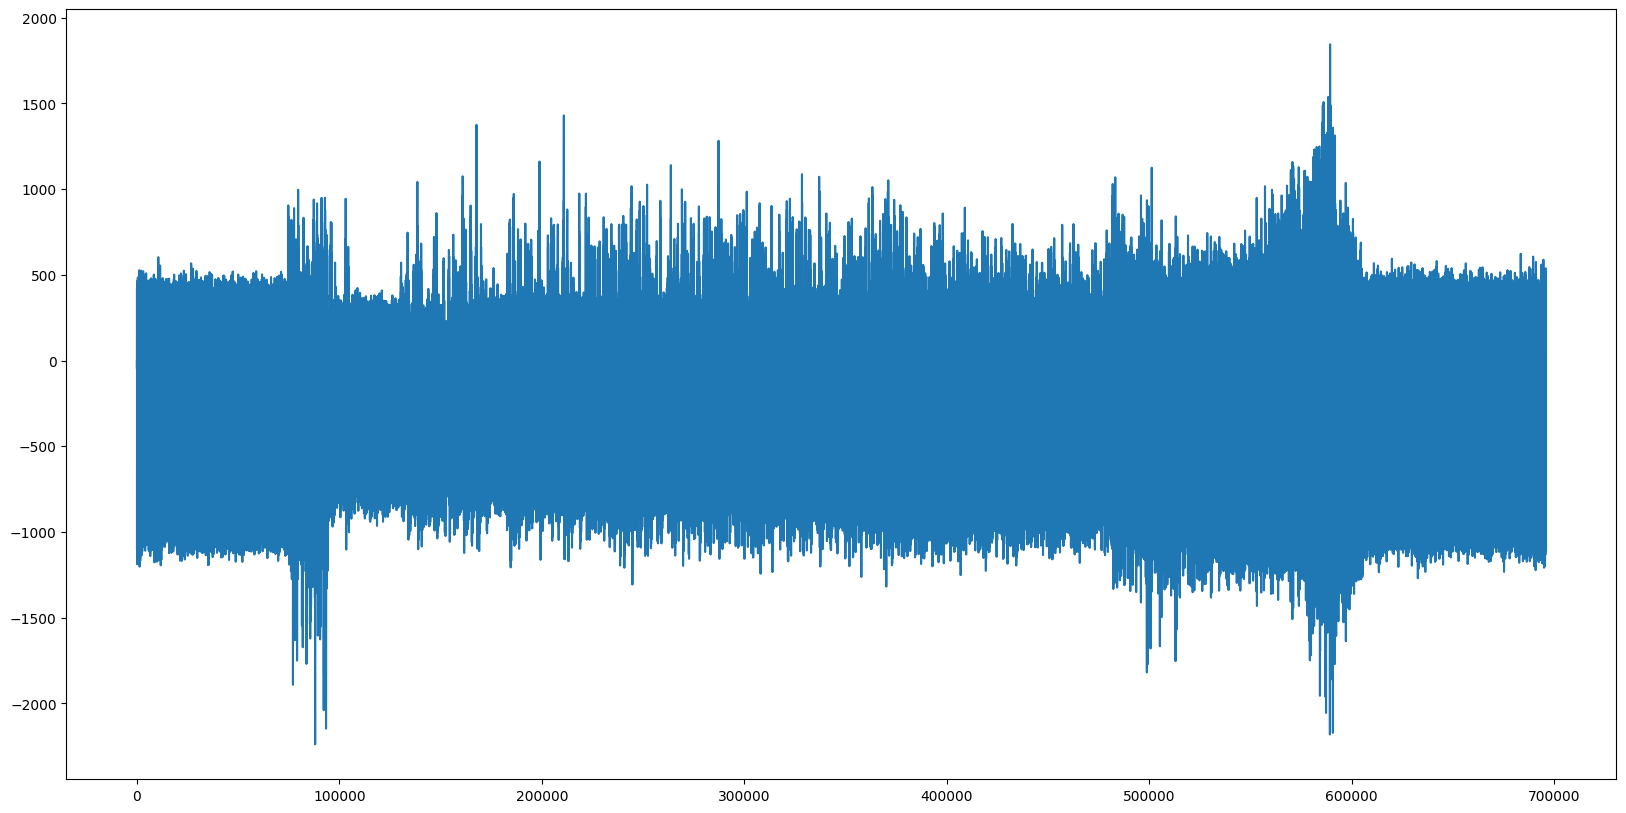

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(walking_ecg_concate)
plt.show()

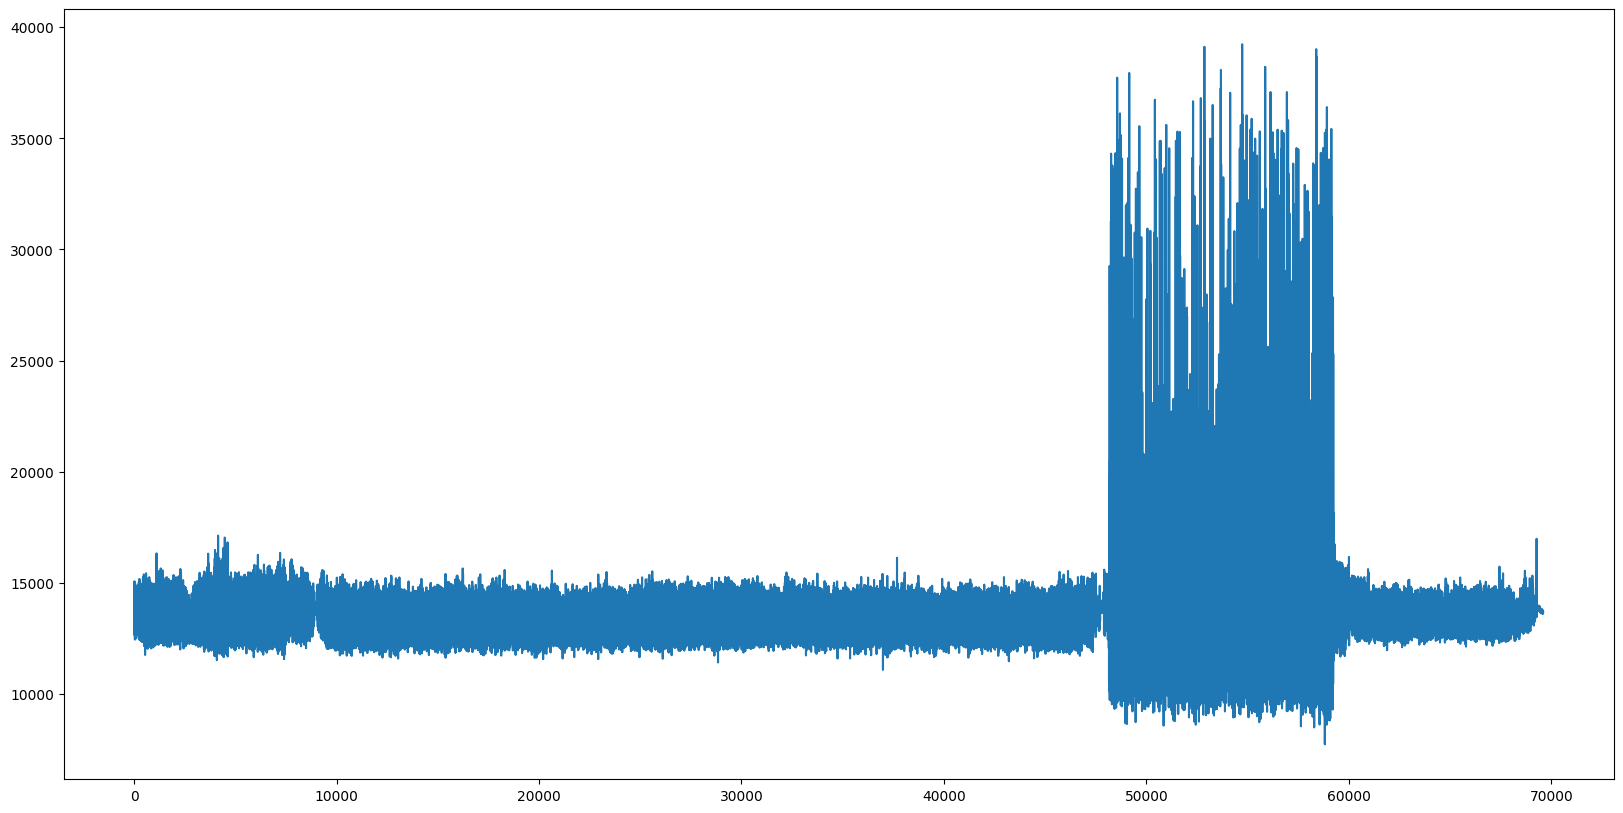

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(walking_acc_concate)
plt.show()

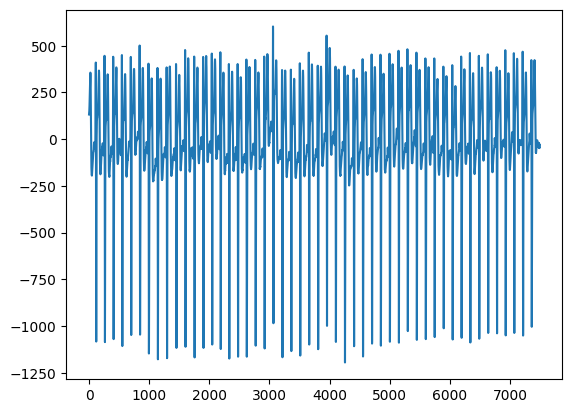

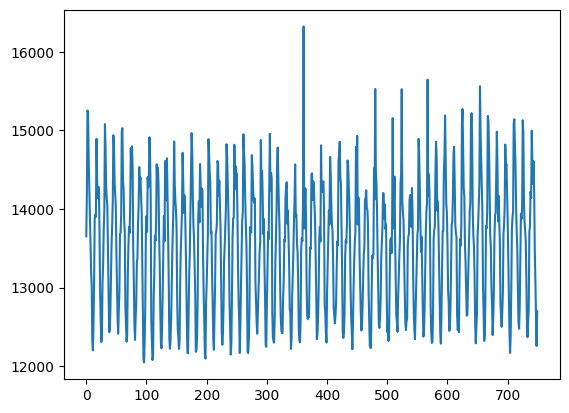

In [22]:
plt.plot(walking_ecg_concate[7500:7500*2])
# plt.plot(thirty_sec_walking_ecg[1])
plt.show()

plt.plot(thirty_sec_walking_acc[1])
plt.show()